Various data sets and plots, with the generic conclusion that the system is not converged wrt NMK as discretization increases, and there's no point in increasing discretization if you don't have a corresponding increase in accuracy for NMK.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from numpy import sqrt
import time

import capytaine as cpt

import sys
import os
sys.path.append(os.path.relpath('../../'))
sys.path.append(os.path.relpath('../'))
from multi_condensed import Problem
from capytaine_generator import CapytaineSlantSolver
from helpers import *
from plotting_helpers import *

import pickle

In [2]:
file1 = "data/ps3.pkl"
file2 = "data/ps4-convergence-to-nmk-100.pkl"
file3 = "data/ps4-nmk-convergence-at-res-50.pkl"
file4 = "data/ps4-all-configs-res-nmk.pkl"
file5 = "data/ps4-res-nmk-grid.pkl"
with open(file1, "rb") as f:
  configurations = pickle.load(f)

In [3]:
def solve_prob(config, res, version, nmk):
  x, cs, prob = solve_problem(Problem, config["h"], config["a"], config["d_in"], config["d_out"], config["heaving"],
                              config["m0"], config["rho"], res, version, nmk = nmk)
  return prob, x

In [4]:
print("True slant added mass:", configurations[5]["CPT slant AM"])
print("MEEM high-res approximation:", configurations[5]["MEEM approx AMs"][-1])
print("True slant added damping:", configurations[5]["CPT slant DP"])
print("MEEM high-res approximation:", configurations[5]["MEEM approx DPs"][-1])

True slant added mass: 126168.07523282901
MEEM high-res approximation: 164644.0212019969
True slant added damping: 1.1634661269339492
MEEM high-res approximation: 1.6044508215821542


In [5]:
# Values obtained at increasing resolution and NMK
# res = 25
# 151443.49254992633 0.684381843842924 #100
# 144995.01272613535 0.7716946527195514 #150
# 143306.40643072198 0.8187600584546425 #200

# res = 30
# 150105.30332435854 0.7251319748360456 #100
# 143438.38064542963 0.7957079263846585 #150
# 141244.9699772406 0.8530128436135318 #200

# res = 40
# 142347.39483047955 0.8350149126044754 #150
# 138823.2579015579 0.8813699786600745 #200

# res = 50
# 138209.9936253744 0.9020630235519791 # 200
# 136068.2543071937 0.9323700378884833 #250

In [6]:
# Data generation (now commented out)
# config = configurations[5]
# resolutions = list(range(1, 51))
# am_array = []
# dp_array = []
# for res in resolutions:
#   prob, x = solve_prob(config, res, 3, 2) # version 3, terms/region = 2
#   am, dp = prob.hydro_coeffs(x, "capytaine")
#   ams = [am]
#   dps = [dp]
#   for terms in range(3, 101):
#     prob, x = solve_prob(config, res, 3, terms)
#     am, dp = prob.hydro_coeffs(x, "capytaine")
#     ams.append(am)
#     dps.append(dp)
#   am_array.append(ams)
#   dp_array.append(dps)

# with open("data/pseudo-slant-4-convergence.pkl", "wb") as f:
#   pickle.dump({"AMs" : am_array,
#                "DPs" : dp_array}, f)

/Users/Bimali/Desktop/SEALab/OpenFLASH/dev/python/slants/plotting_helpers.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


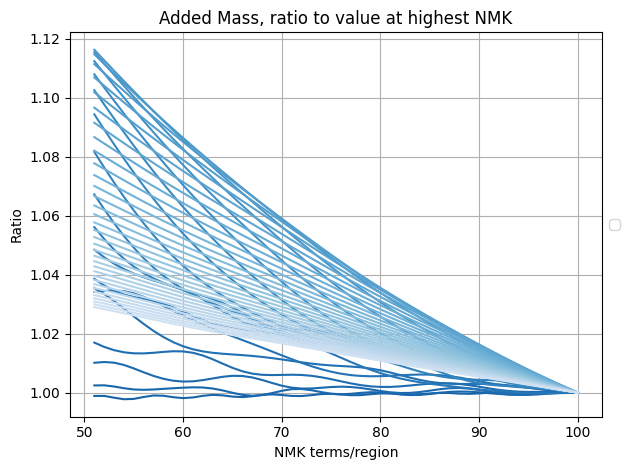

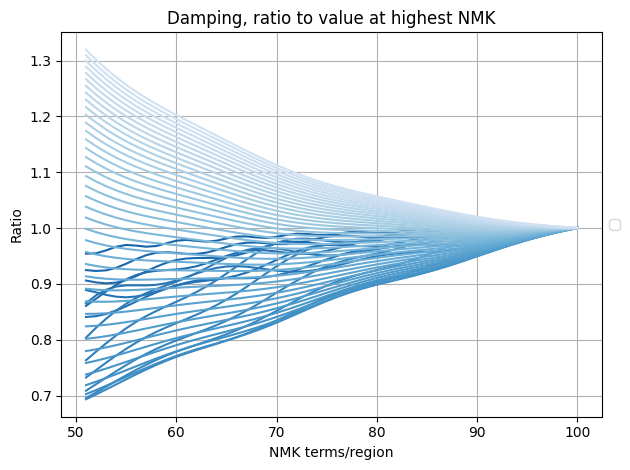

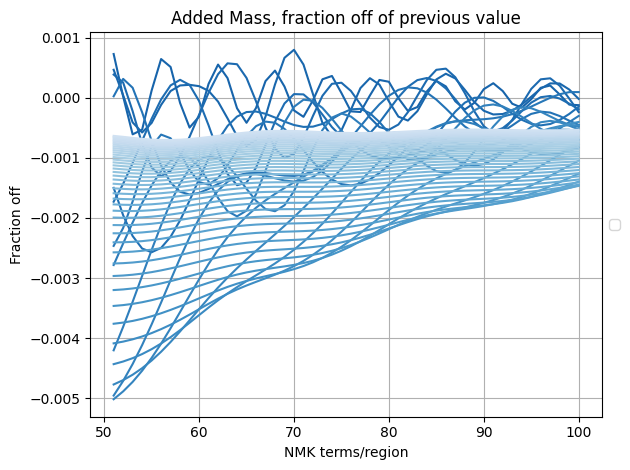

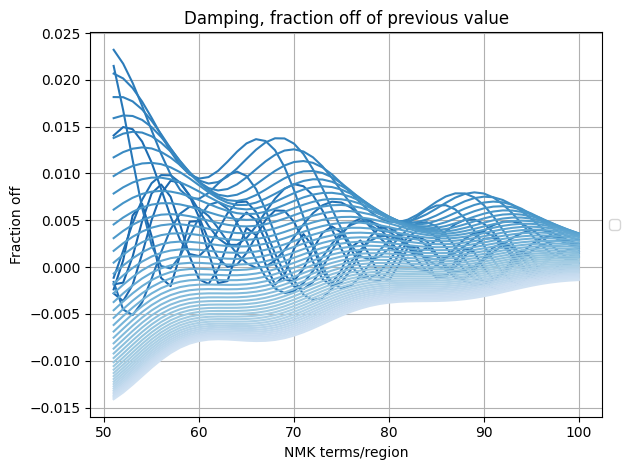

In [7]:
resolutions = list(range(1, 51))
with open(file2, "rb") as f:
  data = pickle.load(f)
am_array = data["AMs"]
dp_array = data["DPs"]
labs = make_label(resolutions, "res")

am_ratio_arr = ratio_conversion(am_array)
dp_ratio_arr = ratio_conversion(dp_array)

am_percent_diff_arr = percent_off(am_array)
dp_percent_diff_arr = percent_off(dp_array)


# plot_multiple_fade(list(range(2, 101)), am_ratio_arr, labs = None, title = "Added Mass, ratio to value at highest NMK",
#                    xlab = "NMK terms/region", ylab = "Ratio", colors = ["Blues"])
# plot_multiple_fade(list(range(2, 101)), dp_ratio_arr, labs = None, title = "Damping, ratio to value at highest NMK",
#                    xlab = "NMK terms/region", ylab = "Ratio", colors = ["Blues"])
# plot_multiple_fade(list(range(3, 101)), am_percent_diff_arr, labs = None, title = "Added Mass, fraction off of previous value",
#                    xlab = "NMK terms/region", ylab = "Fraction off", colors = ["Blues"])
# plot_multiple_fade(list(range(3, 101)), dp_percent_diff_arr, labs = None, title = "Damping, fraction off of previous value",
#                    xlab = "NMK terms/region", ylab = "Fraction off", colors = ["Blues"])
plot_multiple_fade(list(range(2, 101)), am_ratio_arr, labs = None, last_k = 50, title = "Added Mass, ratio to value at highest NMK",
                   xlab = "NMK terms/region", ylab = "Ratio", colors = ["Blues"])
plot_multiple_fade(list(range(2, 101)), dp_ratio_arr, labs = None, last_k = 50, title = "Damping, ratio to value at highest NMK",
                   xlab = "NMK terms/region", ylab = "Ratio", colors = ["Blues"])
plot_multiple_fade(list(range(3, 101)), am_percent_diff_arr, labs = None, last_k = 50, title = "Added Mass, fraction off of previous value",
                   xlab = "NMK terms/region", ylab = "Fraction off", colors = ["Blues"])
plot_multiple_fade(list(range(3, 101)), dp_percent_diff_arr, labs = None, last_k = 50, title = "Damping, fraction off of previous value",
                   xlab = "NMK terms/region", ylab = "Fraction off", colors = ["Blues"])

In [8]:
# Data generation (now commented out)
config = configurations[5]
res = 50
# am_lst = am_array[-1].copy()
# dp_lst = dp_array[-1].copy()

# for terms in range(101, 301):
#   prob, x = solve_prob(config, res, 3, terms)
#   am, dp = prob.hydro_coeffs(x, "capytaine")
#   am_lst.append(am)
#   dp_lst.append(dp)
#   update_data_file({"AMs" : am_lst, "DPs" : dp_lst}, "data/pseudo-slant-4-res-50.pkl")
#   print("Finished NMK = " + str(terms))

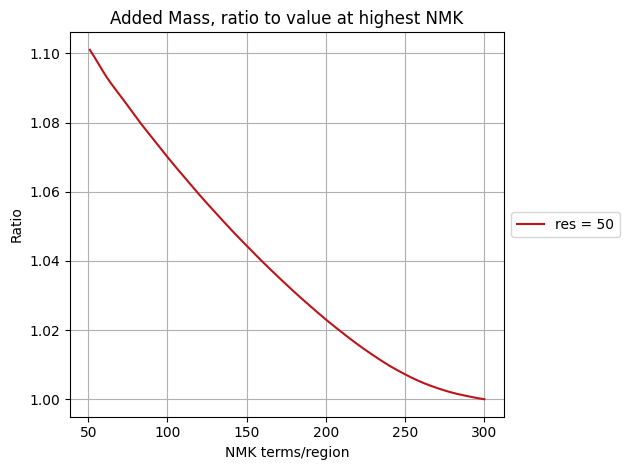

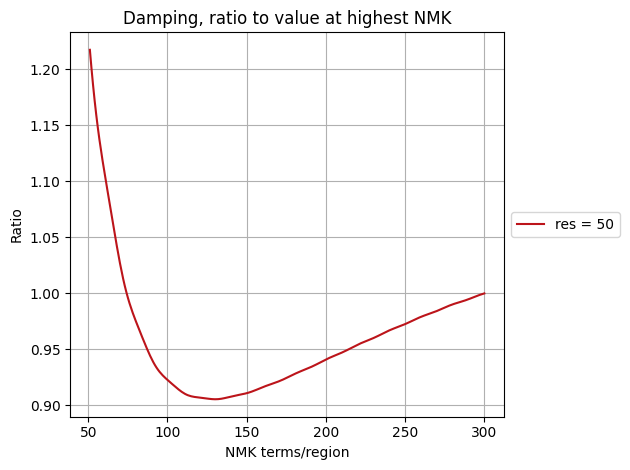

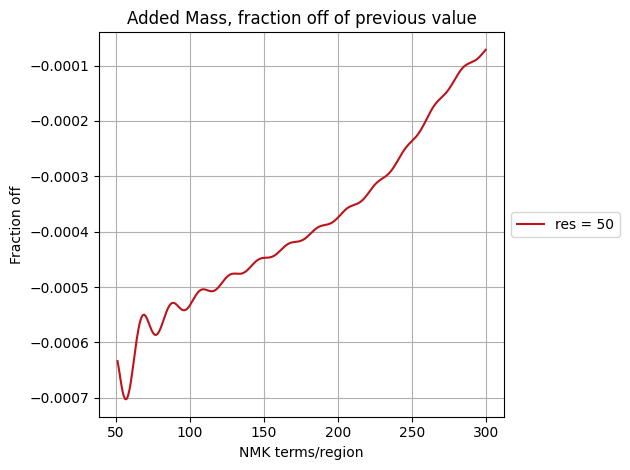

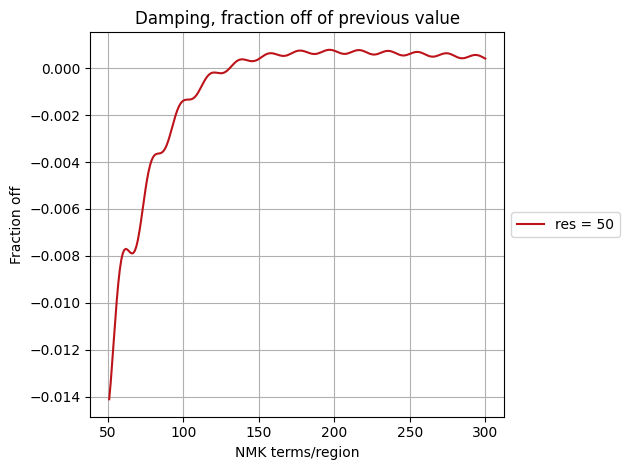

In [9]:
with open(file3, "rb") as f:
  data = pickle.load(f)
am_lst = data["AMs"]
dp_lst = data["DPs"]

am_ratios = ratio_conversion([am_lst])
dp_ratios = ratio_conversion([dp_lst])

am_percent_diffs = percent_off([am_lst])
dp_percent_diffs = percent_off([dp_lst])

# plot_multiple_fade(list(range(2, 301)), [am_lst], labs = ["res = 50"], last_k = 250, title = "Added Mass for different NMK",
#                    xlab = "NMK terms/region", ylab = "Added Mass")
# plot_multiple_fade(list(range(2, 301)), [dp_lst], labs = ["res = 50"], last_k = 250, title = "Damping for different NMK",
#                    xlab = "NMK terms/region", ylab = "Damping")
plot_multiple_fade(list(range(2, 301)), am_ratios, labs = ["res = 50"], last_k = 250, title = "Added Mass, ratio to value at highest NMK",
                   xlab = "NMK terms/region", ylab = "Ratio")
plot_multiple_fade(list(range(2, 301)), dp_ratios, labs = ["res = 50"], last_k = 250, title = "Damping, ratio to value at highest NMK",
                   xlab = "NMK terms/region", ylab = "Ratio")
plot_multiple_fade(list(range(2, 301)), am_percent_diffs, labs = ["res = 50"], last_k = 250, title = "Added Mass, fraction off of previous value",
                   xlab = "NMK terms/region", ylab = "Fraction off")
plot_multiple_fade(list(range(2, 301)), dp_percent_diffs, labs = ["res = 50"], last_k = 250, title = "Damping, fraction off of previous value",
                   xlab = "NMK terms/region", ylab = "Fraction off")

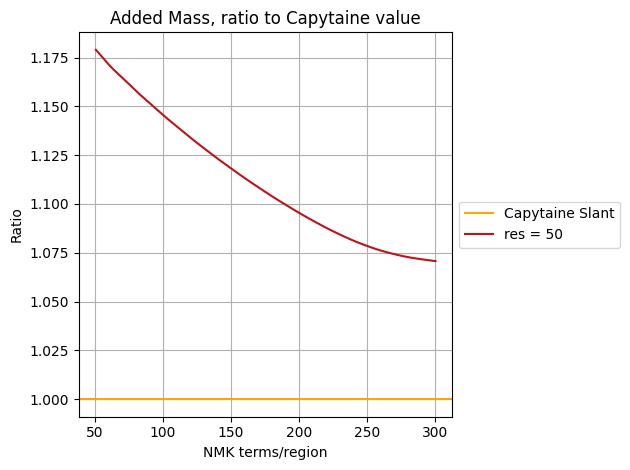

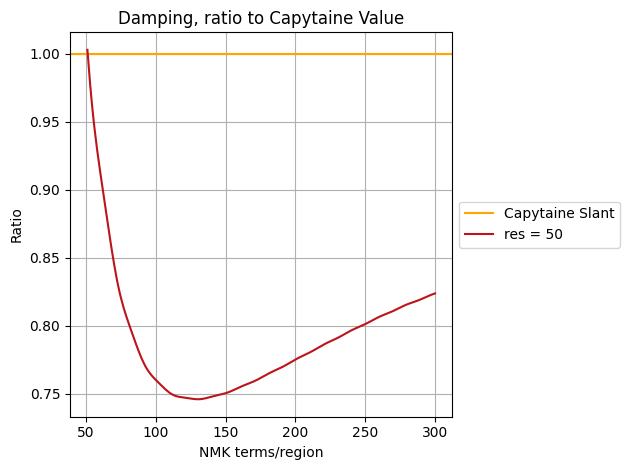

In [10]:
true_am_ratios = [entry/configurations[5]["CPT slant AM"] for entry in am_lst]
true_dp_ratios = [entry/configurations[5]["CPT slant DP"] for entry in dp_lst]

plot_multiple_fade(list(range(2, 301)), [true_am_ratios], labs = ["res = 50"], last_k = 250, title = "Added Mass, ratio to Capytaine value",
                   xlab = "NMK terms/region", ylab = "Ratio", hline = 1, hlab = "Capytaine Slant")
plot_multiple_fade(list(range(2, 301)), [true_dp_ratios], labs = ["res = 50"], last_k = 250, title = "Damping, ratio to Capytaine Value",
                   xlab = "NMK terms/region", ylab = "Ratio", hline = 1, hlab = "Capytaine Slant")

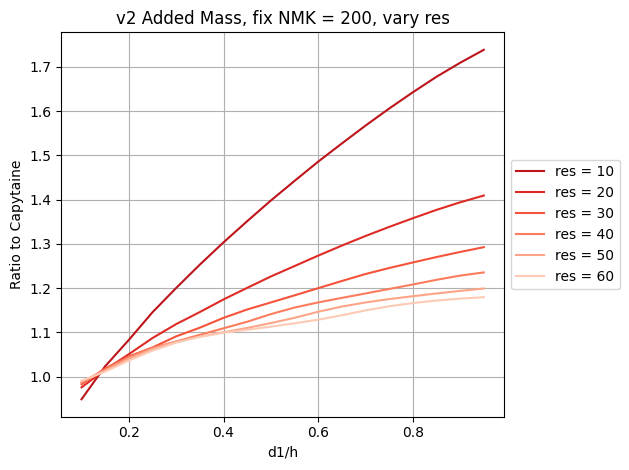

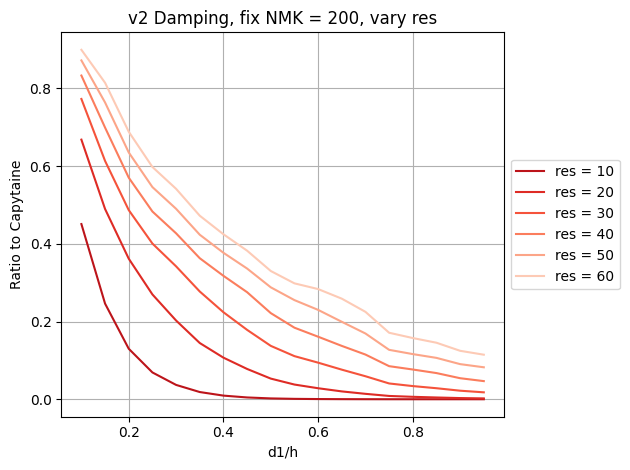

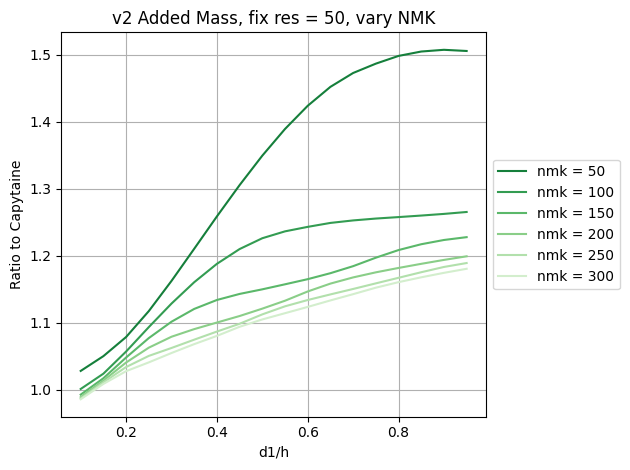

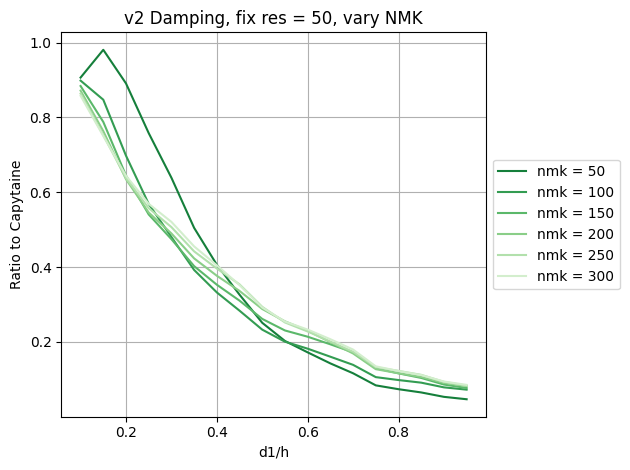

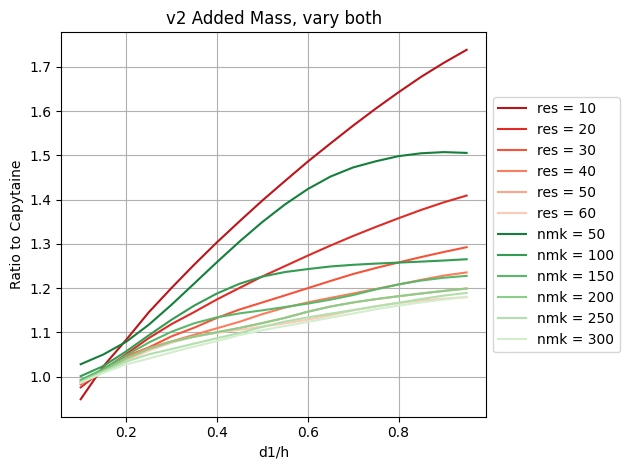

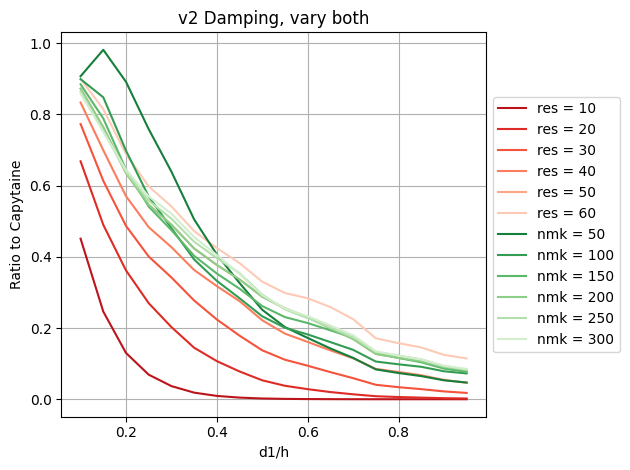

In [11]:
# Plot type 1
# x-axis: d1/h
# y-axis: ratio of MEEM hydro-coefficient to Capytaine's value.
# Fixed res, vary NMK in the different lines.
# Fixed NMK, vary res in the different lines.

with open(file4, "rb") as f:
  data = pickle.load(f)

keys = ["AMs by res", "DPs by res", "AMs by nmk", "DPs by nmk"]

version = 2

def plot_type_1(configurations, version):
  x = [entry/100 for entry in list(range(10, 96, 5))]
  resolutions = [10, 20, 30, 40, 50, 60]
  nmks = [50, 100, 150, 200, 250, 300]

  keys = ["AMs by res v" + str(version), "DPs by res v" + str(version), "AMs by nmk v" + str(version), "DPs by nmk v" + str(version)]
  hc_raw = [extract(configurations[1:], key, 6) for key in keys]

  ams_by_res_ratio = list_ratios(hc_raw[0], [config["CPT slant AM"] for config in configurations[1:]])
  dps_by_res_ratio = list_ratios(hc_raw[1], [config["CPT slant DP"] for config in configurations[1:]])
  ams_by_nmk_ratio = list_ratios(hc_raw[2], [config["CPT slant AM"] for config in configurations[1:]])
  dps_by_nmk_ratio = list_ratios(hc_raw[3], [config["CPT slant DP"] for config in configurations[1:]])

  res_labs = make_label(resolutions, "res")
  nmk_labs = make_label(nmks, "nmk")

  plot_multiple_fade(x, [ams_by_res_ratio], labs = res_labs, title = "v" + str(version) + " Added Mass, fix NMK = 200, vary res",
                    xlab = "d1/h", ylab = "Ratio to Capytaine")
  plot_multiple_fade(x, [dps_by_res_ratio], labs = res_labs, title = "v" + str(version) + " Damping, fix NMK = 200, vary res",
                    xlab = "d1/h", ylab = "Ratio to Capytaine")
  plot_multiple_fade(x, [ams_by_nmk_ratio], labs = nmk_labs, title = "v" + str(version) + " Added Mass, fix res = 50, vary NMK",
                    xlab = "d1/h", ylab = "Ratio to Capytaine", colors = ["Greens"])
  plot_multiple_fade(x, [dps_by_nmk_ratio], labs = nmk_labs, title = "v" + str(version) + " Damping, fix res = 50, vary NMK",
                    xlab = "d1/h", ylab = "Ratio to Capytaine", colors = ["Greens"])
  plot_multiple_fade(x, [ams_by_res_ratio, ams_by_nmk_ratio], labs = [res_labs, nmk_labs], title = "v" + str(version) + " Added Mass, vary both",
                    xlab = "d1/h", ylab = "Ratio to Capytaine")
  plot_multiple_fade(x, [dps_by_res_ratio, dps_by_nmk_ratio], labs = [res_labs, nmk_labs], title = "v" + str(version) + " Damping, vary both",
                    xlab = "d1/h", ylab = "Ratio to Capytaine")
  
plot_type_1(data, version)

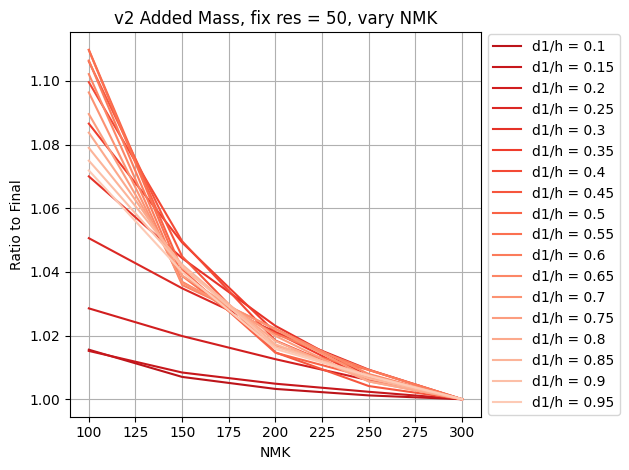

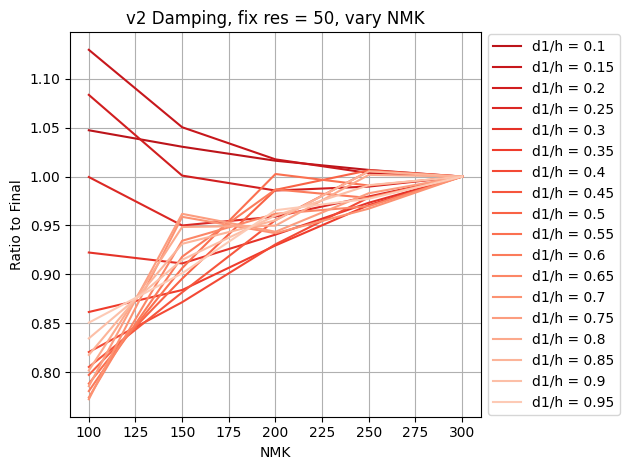

In [12]:
# Plot type 2 (Typical MEEM convergence-study style)
# x-axis: nmk
# y-axis: ratio of hydro-coefficient to final value.
# Fixed res, vary configuration in the different lines.

def transpose(matrix):
    return [list(row) for row in zip(*matrix)]

def select(lst_of_lsts, indices):
    return [[lst[i] for i in indices] for lst in lst_of_lsts]

def plot_type_2(configurations, version):
    keys = ["AMs by res v" + str(version), "DPs by res v" + str(version), "AMs by nmk v" + str(version), "DPs by nmk v" + str(version)]
    hc_raw = [extract(configurations[1:], key, 6) for key in keys]

    x = [50, 100, 150, 200, 250, 300]
    d1h = [entry/100 for entry in list(range(10, 96, 5))]
    d1h_labs = make_label(d1h, "d1/h")

    final_values = [([config[key][-1] for config in configurations[1:]]) for key in keys]

    ams_by_config_nmk_ratio = transpose(list_ratios(hc_raw[2], final_values[2]))
    dps_by_config_nmk_ratio = transpose(list_ratios(hc_raw[3], final_values[3]))

    plot_multiple_fade(x, [ams_by_config_nmk_ratio], labs = d1h_labs, title = "v" + str(version) + " Added Mass, fix res = 50, vary NMK",
                    xlab = "NMK", ylab = "Ratio to Final", last_k = 5)
    plot_multiple_fade(x, [dps_by_config_nmk_ratio], labs = d1h_labs, title = "v" + str(version) + " Damping, fix res = 50, vary NMK",
                    xlab = "NMK", ylab = "Ratio to Final", last_k = 5)

    # ys0, labs0 = select([ams_by_config_nmk_ratio, d1h_labs], [0, 4, 9, 13, 17])
    # plot_multiple_fade(x, [ys0], labs = labs0, title = "v" + str(version) + " Added Mass, fix res = 50, vary NMK",
    #                 xlab = "NMK", ylab = "Ratio to Final", last_k = 5)
    # ys0, labs0 = select([dps_by_config_nmk_ratio, d1h_labs], [0, 4, 9, 13, 17])
    # plot_multiple_fade(x, [ys0], labs = labs0, title = "v" + str(version) + " Damping, fix res = 50, vary NMK",
    #                 xlab = "NMK", ylab = "Ratio to Final", last_k = 5)
    
plot_type_2(data, version)

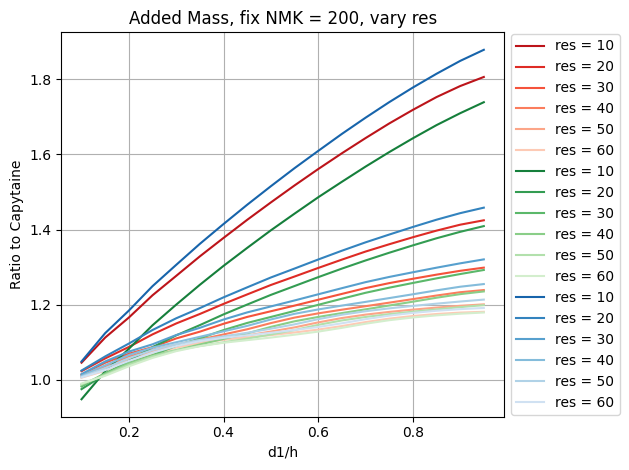

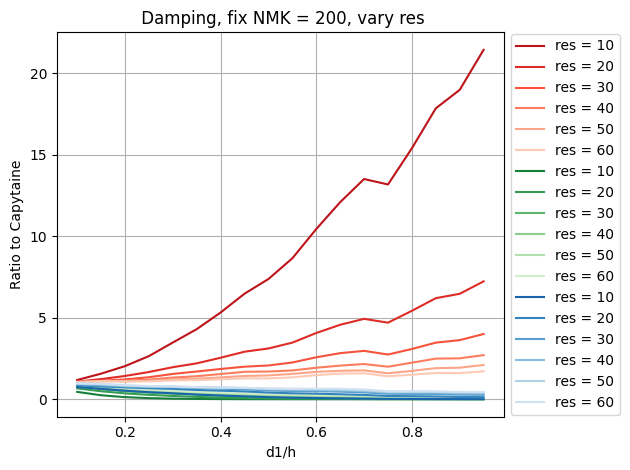

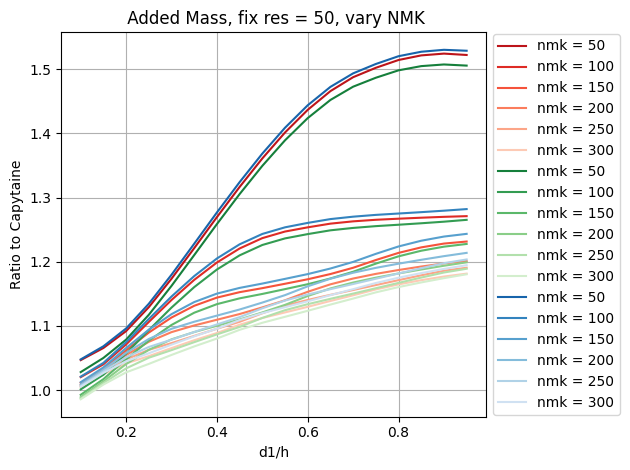

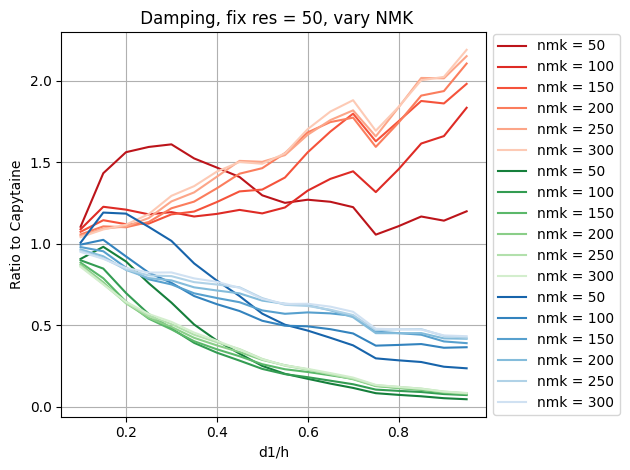

In [13]:
# Plot type 1, with all three variations.
with open(file4, "rb") as f:
  data = pickle.load(f)

x = [entry/100 for entry in list(range(10, 96, 5))]
resolutions = [10, 20, 30, 40, 50, 60]
nmks = [50, 100, 150, 200, 250, 300]

keys = ["AMs by res", "DPs by res", "AMs by nmk", "DPs by nmk"]
hc_raw123 = [[extract(data[1:], key + " v" + str(version), 6) for key in keys] for version in [1, 2, 3]]

ams_by_res_ratios = [list_ratios(hc_raw[0], [config["CPT slant AM"] for config in data[1:]]) for hc_raw in hc_raw123]
dps_by_res_ratios = [list_ratios(hc_raw[1], [config["CPT slant DP"] for config in data[1:]]) for hc_raw in hc_raw123]
ams_by_nmk_ratios = [list_ratios(hc_raw[2], [config["CPT slant AM"] for config in data[1:]]) for hc_raw in hc_raw123]
dps_by_nmk_ratios = [list_ratios(hc_raw[3], [config["CPT slant DP"] for config in data[1:]]) for hc_raw in hc_raw123]

res_labs = [make_label(resolutions, "res") for _ in range(3)]
nmk_labs = [make_label(nmks, "nmk") for _ in range(3)]

plot_multiple_fade(x, ams_by_res_ratios, labs = res_labs, title = "Added Mass, fix NMK = 200, vary res",
                  xlab = "d1/h", ylab = "Ratio to Capytaine")
plot_multiple_fade(x, dps_by_res_ratios, labs = res_labs, title = " Damping, fix NMK = 200, vary res",
                  xlab = "d1/h", ylab = "Ratio to Capytaine")
plot_multiple_fade(x, ams_by_nmk_ratios, labs = nmk_labs, title = " Added Mass, fix res = 50, vary NMK",
                  xlab = "d1/h", ylab = "Ratio to Capytaine")
plot_multiple_fade(x, dps_by_nmk_ratios, labs = nmk_labs, title = " Damping, fix res = 50, vary NMK",
                  xlab = "d1/h", ylab = "Ratio to Capytaine")

/Users/Bimali/Desktop/SEALab/OpenFLASH/dev/python/slants/plotting_helpers.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Users/Bimali/Desktop/SEALab/OpenFLASH/dev/python/slants/plotting_helpers.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


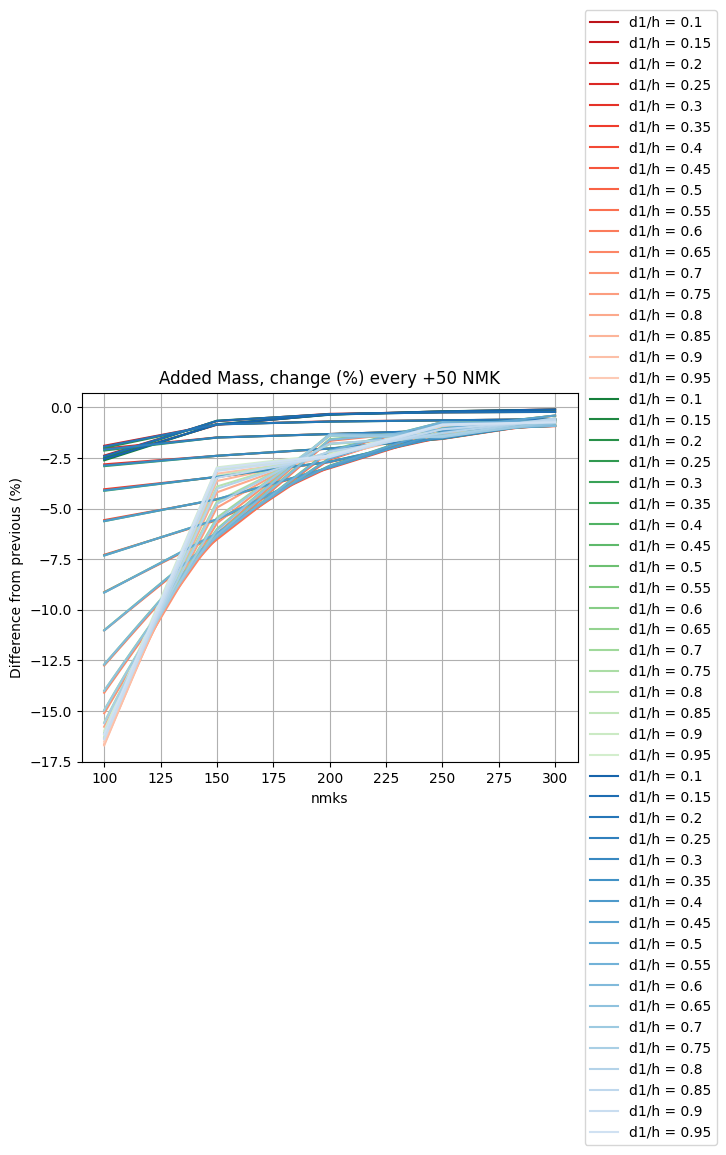

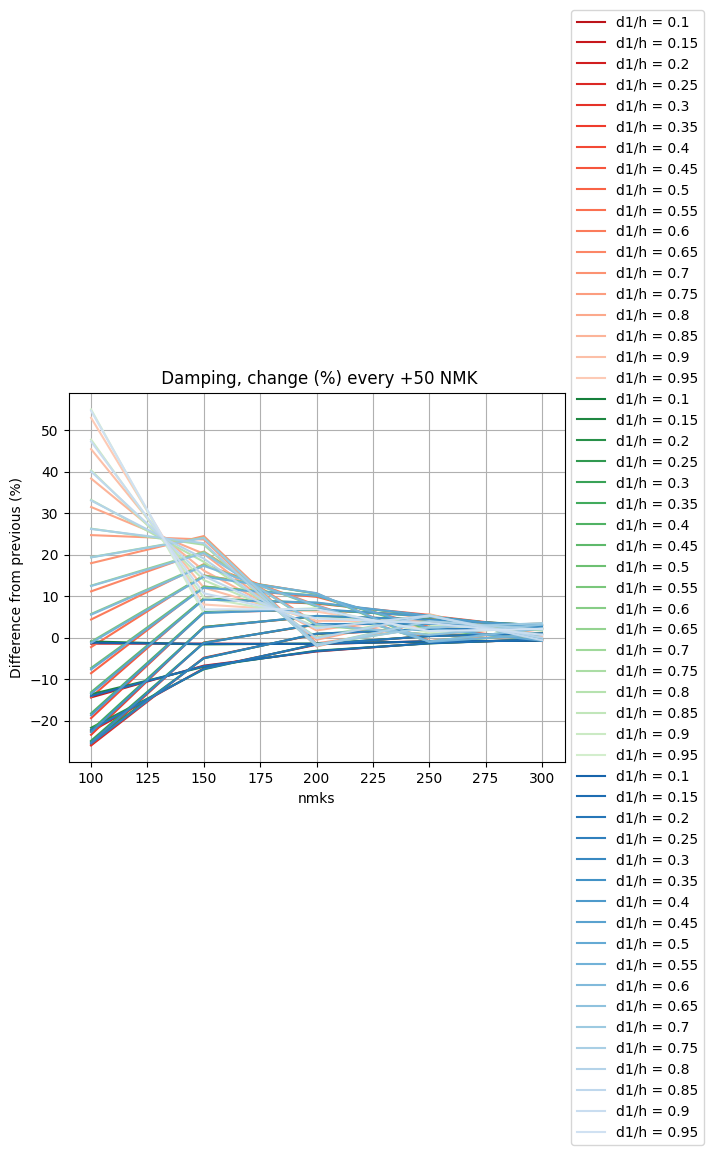

In [14]:
x = nmks[1:]

ratios = [[[[(cf[i]/cf[i-1] - 1) * 100 for i in range(1, 6)] for cf in transpose(key)] for key in version] for version in hc_raw123]

ams_by_nmk_ratios = [ratios[version - 1][2] for version in [1, 2, 3]]
dps_by_nmk_ratios = [ratios[version - 1][3] for version in [1, 2, 3]]

d1h_labs = [make_label([entry/100 for entry in list(range(10, 96, 5))], "d1/h") for _ in range(3)]

plot_multiple_fade(x, ams_by_nmk_ratios, labs = d1h_labs, title = "Added Mass, change (%) every +50 NMK",
                  xlab = "nmks", ylab = "Difference from previous (%)")
plot_multiple_fade(x, dps_by_nmk_ratios, labs = d1h_labs, title = " Damping, change (%) every +50 NMK",
                  xlab = "nmks", ylab = "Difference from previous (%)")

In [15]:
# Data generation (now commented out)
# Have data for res = [10, 20, 30, 40, 50, 60] with NMK = 200
# Have data for NMK = [50, 100, 150, 200, 250, 300] with res = 50
# Want data for res = [40, 50, 60, 70], NMK = [50, 100, 150, 200, 250, 300]
# Need to compute data for:
# NMK = [50, 100, 150, 250, 300] for res = 40, 60
# NMK = [50, 100, 150, 200, 250, 300], res = 70
# d1 = 80 (config [15]). Do v2 (looks the nicest for AM)

# data_dict = {}
# config0 = configurations[15]
# for res in [40, 60]:
#   for nmk in [250]: # [300]
#     prob, x = solve_prob(config0, res, 2, nmk)
#     am, dp = prob.hydro_coeffs(x, "capytaine")
#     data_dict[str(res) + "-" + str(nmk) + " AM"] = am
#     data_dict[str(res) + "-" + str(nmk) + " DP"] = dp
#     update_data_file(data_dict, "data/ps4-res-nmk-grid.pkl")
# for res in [70]:
#   for nmk in [250]: # [300]
#     prob, x = solve_prob(config0, res, 2, nmk)
#     am, dp = prob.hydro_coeffs(x, "capytaine")
#     data_dict[str(res) + "-" + str(nmk) + " AM"] = am
#     data_dict[str(res) + "-" + str(nmk) + " DP"] = dp
#     update_data_file(data_dict, "data/ps4-res-nmk-grid.pkl")

# Populate data from previous work:
# with open("data/ps4-all-configs-v2.pkl", "rb") as f:
#   configurations = pickle.load(f)
# con15 = configurations[15]

# # get the res = 50 data
# res = 50
# nmks = [50, 100, 150, 200, 250, 300]
# for i in range(6):
#   data_dict[str(res) + "-" + str(nmks[i]) + " AM"] = con15["AMs by nmk"][i]
#   data_dict[str(res) + "-" + str(nmks[i]) + " DP"] = con15["DPs by nmk"][i]

# # get the nmk = 200 data
# nmk = 200
# data_dict[str(40) + "-" + str(nmk) + " AM"] = con15["AMs by res"][3]
# data_dict[str(40) + "-" + str(nmk) + " DP"] = con15["DPs by res"][3]
# data_dict[str(60) + "-" + str(nmk) + " AM"] = con15["AMs by res"][5]
# data_dict[str(60) + "-" + str(nmk) + " DP"] = con15["DPs by res"][5]
# update_data_file(data_dict, "data/ps4-res-nmk-grid.pkl")

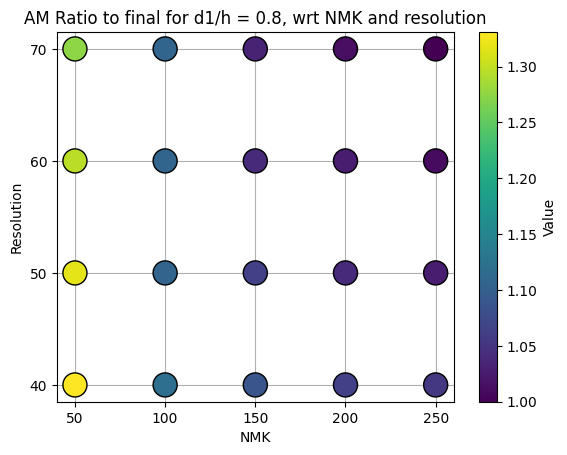

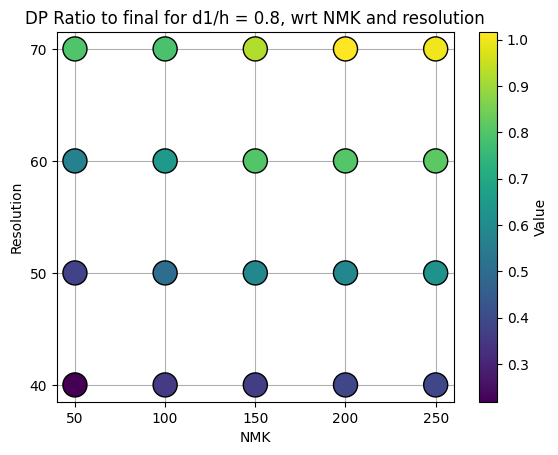

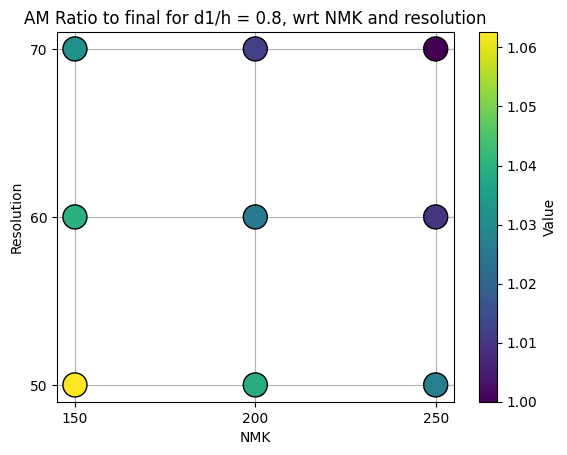

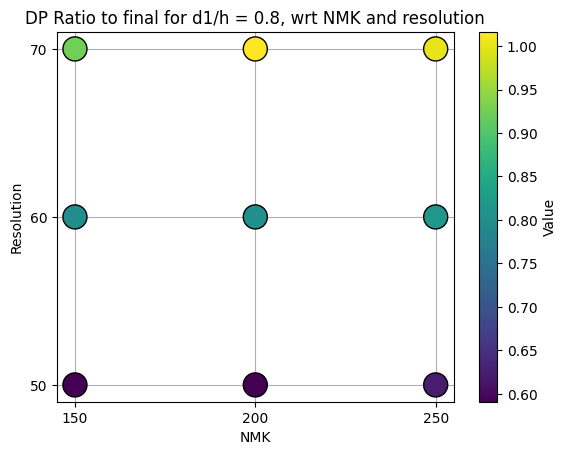

In [16]:
def plot_res_nmk_grid(coeff, data_dict, resolutions, nmks):

  data = [[data_dict[str(res) + "-" + str(nmk) + " " + coeff] for nmk in nmks] for res in resolutions]

  # Axis values
  x_vals = np.array(nmks)
  y_vals = np.array(resolutions)

  values = np.array(data)/(data[-1][-1]) # scale it
  

  # Create coordinate grid
  X, Y = np.meshgrid(x_vals, y_vals)

  # Flatten everything
  x_flat = X.flatten()
  y_flat = Y.flatten()
  val_flat = values.flatten()

  plt.grid(True, zorder=0)
  # Plot
  plt.scatter(x_flat, y_flat, c=val_flat, s=300, cmap='viridis', edgecolors='black', zorder=2)

  plt.colorbar(label='Value')
  plt.xlabel("NMK")
  plt.ylabel("Resolution")
  plt.title(coeff + " Ratio to final for d1/h = 0.8, wrt NMK and resolution")
  plt.xticks(x_vals)
  plt.yticks(y_vals)
  plt.show()

resolutions = [40, 50, 60, 70]
nmks = [50, 100, 150, 200, 250]

with open(file5, "rb") as f:
  data_dict = pickle.load(f)
plot_res_nmk_grid("AM", data_dict, resolutions, nmks)
plot_res_nmk_grid("DP", data_dict, resolutions, nmks)
plot_res_nmk_grid("AM", data_dict, resolutions[1:], nmks[2:]) # Possibly more informative scaling.
plot_res_nmk_grid("DP", data_dict, resolutions[1:], nmks[2:])